In [3]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [4]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Ionosphere\Ionosphere_AW_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243


In [5]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
int64		column 2	0
float64		column 3	0
float64		column 4	0
float64		column 5	3
float64		column 6	0
float64		column 7	6
float64		column 8	0
float64		column 9	9
float64		column 10	0
float64		column 11	9
float64		column 12	0
float64		column 13	12
float64		column 14	0
float64		column 15	3
float64		column 16	0
float64		column 17	9
float64		column 18	0
float64		column 19	9
float64		column 20	0
float64		column 21	6
float64		column 22	3
float64		column 23	3
float64		column 24	0
float64		column 25	3
float64		column 26	0
float64		column 27	0
float64		column 28	0
float64		column 29	6
float64		column 30	0
float64		column 31	3
float64		column 32	3
float64		column 33	6
float64		column 34	3


In [6]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,351.000000,351.0,351.000000,351.000000,348.000000,351.000000,345.000000,351.000000,342.000000,351.000000,...,348.000000,351.000000,351.000000,351.000000,345.000000,351.000000,348.000000,348.000000,345.000000,348.000000
mean,0.891738,0.0,0.641342,0.044372,0.605992,0.115889,0.552104,0.119360,0.507157,0.181345,...,0.397317,-0.071187,0.541641,-0.069538,0.383801,-0.027907,0.355230,0.002262,0.350487,0.015890
std,0.311155,0.0,0.497708,0.441435,0.515745,0.460810,0.488839,0.520750,0.511606,0.483851,...,0.579494,0.508495,0.516205,0.550025,0.569400,0.507974,0.569208,0.510422,0.517696,0.466277
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.472135,-0.064735,0.420677,-0.024795,0.206900,-0.054840,0.078192,-0.048075,...,0.000000,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.234442,0.000000,-0.163890
50%,1.000000,0.0,0.871110,0.016310,0.811145,0.022800,0.727270,0.014710,0.682430,0.018290,...,0.555330,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.446875,0.000000,0.408210,0.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.975450,0.445675,0.955663,0.534195,...,0.909400,0.156765,0.999945,0.153535,0.885680,0.154075,0.855750,0.202210,0.807740,0.171215
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

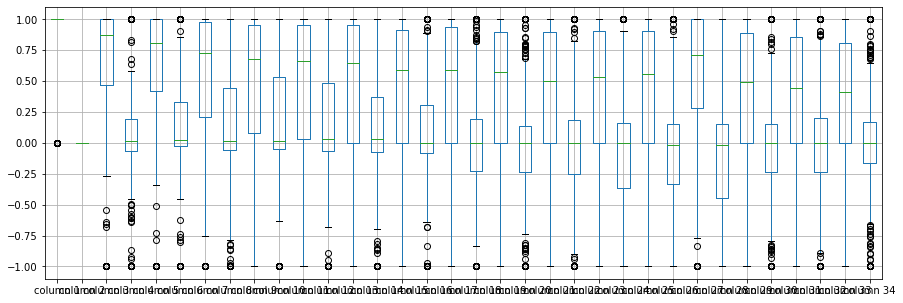

In [7]:
df.boxplot(return_type='axes', figsize=(15,5))

In [8]:
df.mean()

column 1     0.891738
column 2     0.000000
column 3     0.641342
column 4     0.044372
column 5     0.605992
column 6     0.115889
column 7     0.552104
column 8     0.119360
column 9     0.507157
column 10    0.181345
column 11    0.476457
column 12    0.155040
column 13    0.401648
column 14    0.093414
column 15    0.338739
column 16    0.071132
column 17    0.384740
column 18   -0.003617
column 19    0.357874
column 20   -0.024025
column 21    0.340329
column 22    0.003205
column 23    0.357360
column 24   -0.057406
column 25    0.397317
column 26   -0.071187
column 27    0.541641
column 28   -0.069538
column 29    0.383801
column 30   -0.027907
column 31    0.355230
column 32    0.002262
column 33    0.350487
column 34    0.015890
dtype: float64

In [9]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,NaN,0.302034,-0.006529,0.161508,0.127606,0.200116,0.027079,0.187079,-0.051883,...,0.011289,0.149789,-0.203100,-0.010725,0.139786,-0.121415,0.170184,-0.097869,0.144387,-0.008251
column 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
column 3,0.302034,NaN,1.000000,0.143365,0.486377,0.025768,0.452213,0.008717,0.480081,0.047916,...,0.307876,-0.073202,0.077911,0.123345,0.337436,0.057890,0.268745,-0.024720,0.273575,0.003190
column 4,-0.006529,NaN,0.143365,1.000000,0.006901,-0.190308,-0.030085,0.255003,-0.301731,0.207697,...,-0.100201,-0.236987,-0.046910,0.000743,-0.047838,0.342301,-0.164087,-0.135244,-0.131879,0.048044
column 5,0.161508,NaN,0.486377,0.006901,1.000000,0.032483,0.590248,-0.041187,0.456806,-0.036611,...,0.225448,-0.039473,0.129302,0.175913,0.271833,0.046113,0.410054,0.015306,0.370834,-0.124592
column 6,0.127606,NaN,0.025768,-0.190308,0.032483,1.000000,-0.033551,0.274747,-0.123682,0.200080,...,-0.183454,0.041787,-0.175433,-0.068775,-0.029949,-0.158090,-0.094533,0.325084,-0.006166,0.172163
column 7,0.200116,NaN,0.452213,-0.030085,0.590248,-0.033551,1.000000,-0.173182,0.455523,-0.097044,...,0.290016,0.090982,0.113544,0.095531,0.305417,-0.014795,0.411261,-0.025579,0.538304,-0.099882
column 8,0.027079,NaN,0.008717,0.255003,-0.041187,0.274747,-0.173182,1.000000,-0.332944,0.373567,...,-0.184366,-0.133023,-0.254130,0.072373,-0.140865,0.078585,-0.155937,0.152243,-0.213732,0.351062
column 9,0.187079,NaN,0.480081,-0.301731,0.456806,-0.123682,0.455523,-0.332944,1.000000,-0.254601,...,0.362293,0.103029,0.180065,0.146254,0.330910,-0.034956,0.312853,-0.075103,0.344585,-0.115773
column 10,-0.051883,NaN,0.047916,0.207697,-0.036611,0.200080,-0.097044,0.373567,-0.254601,1.000000,...,-0.254067,-0.043680,-0.250947,0.072018,-0.109575,-0.008578,-0.148841,-0.004845,-0.202964,0.094655


In [10]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [11]:
imputer = md.Midas(layer_structure = [34,34+48,34+48+48,34+48+48+48,34+48+48+48+48,34+48+48+48,34+48+48,34+48,34], vae_layer = False, seed = 480)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 20.19923718770345
Epoch: 1 , loss: 20.13473229181199
Epoch: 2 , loss: 20.16088921683175
Epoch: 3 , loss: 20.000043233235676
Epoch: 4 , loss: 19.954556419735862
Epoch: 5 , loss: 20.041998000372026
Epoch: 6 , loss: 20.04544312613351
Epoch: 7 , loss: 19.860293342953636
Epoch: 8 , loss: 19.729462396530877
Epoch: 9 , loss: 19.543928146362305
Epoch: 10 , loss: 19.253377823602584
Epoch: 11 , loss: 18.624359584990003
Epoch: 12 , loss: 18.197683288937522
Epoch: 13 , loss: 17.854769388834637
Epoch: 14 , loss: 17.714738346281507
Epoch: 15 , loss: 17.71008437020438
Epoch: 16 , loss: 17.56721868969145
Epoch: 17 , loss: 17.47031507037935
Epoch: 18 , loss: 17.604188419523695
Epoch: 19 , loss: 17.549647512890044
Epoch: 20 , loss: 17.40702724456787
Epoch: 21 , loss: 17.337455522446405
Epoch: 22 , loss: 17.296670822870162
Epoch: 23 , loss: 17.234640530177526
Epoch: 24 , loss: 17.316062836419967
Epoch: 25 , loss: 17.2626

In [12]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(351, 34)

In [13]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     0.0
column 2     0.0
column 3     1.0
column 4     1.0
column 5     0.0
column 6     0.0
column 7     0.0
column 8     0.0
column 9    -1.0
column 10   -1.0
column 11    0.0
column 12    0.0
column 13    0.0
column 14    0.0
column 15   -1.0
column 16   -1.0
column 17   -1.0
column 18   -1.0
column 19   -1.0
column 20    1.0
column 21   -1.0
column 22    1.0
column 23    0.0
column 24    0.0
column 25    0.0
column 26    0.0
column 27    1.0
column 28   -1.0
column 29   -1.0
column 30    1.0
column 31   -1.0
column 32    1.0
column 33   -1.0
column 34    1.0
Name: 21, dtype: float64

In [14]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Ionosphere.xlsx', header=None,names=column_names)

In [15]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
347,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
348,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
349,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [16]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [17]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [18]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

5.611837644947104

In [19]:
denominator=Frobenius_norm(complete_df)
denominator

68.46016929900117

In [20]:
NRMS=numerator/denominator
NRMS


0.08197230159389893

In [21]:
new_df.iloc[66,:]

column 1     1.00000
column 2     0.00000
column 3     1.00000
column 4     0.28046
column 5     1.00000
column 6     0.02477
column 7     1.00000
column 8     0.07764
column 9     1.00000
column 10    0.04317
column 11    0.98762
column 12    0.33266
column 13    1.00000
column 14    0.05489
column 15    1.00000
column 16    0.04384
column 17    0.95750
column 18   -0.24598
column 19    0.84371
column 20   -0.08668
column 21    1.00000
column 22    0.04150
column 23    0.99933
column 24    0.27376
column 25    1.00000
column 26   -0.39056
column 27    0.96414
column 28   -0.02174
column 29    0.86747
column 30    0.23360
column 31    0.94578
column 32   -0.22021
column 33    0.80355
column 34   -0.07329
Name: 66, dtype: float64

In [22]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243


In [23]:
imputations[-1].to_excel("Ionosphere_AW_1(imp).xlsx", index=False, header=False)